In [80]:
!git clone https://github.com/AJITKUMAR130012/Computer-vision.git

Cloning into 'Computer-vision'...
remote: Enumerating objects: 265, done.
remote: Counting objects: 100% (265/265), done.
remote: Compressing objects: 100% (242/242), done.
remote: Total 265 (delta 19), reused 250 (delta 13), pack-reused 0
Receiving objects: 100% (265/265), 12.57 MiB | 22.26 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [81]:
!ls

best_model.pt	 database.csv  __pycache__  utils.py
Computer-vision  Dataset       Question


In [82]:
cd Computer-vision/

/content/Computer-vision/Assignment2/Computer-vision


In [83]:
ls

Assignment1/  Assignment2/  README.md


In [84]:
cd Assignment2

/content/Computer-vision/Assignment2/Computer-vision/Assignment2


In [85]:
ls

Dataset/  Question/


In [86]:
import os
import random
import pandas as pd
import numpy as np

In [87]:
path="./Dataset/Problem-1/logo matching/Ex1/logos/"

In [88]:
l=os.listdir(path)
print(len(l))

10


In [89]:
m=[]
for i in range(len(l)):
    m.append(l[i])
    m.append(l[i])
k=0
for i in range(len(l)):
    id=random.randint(0, len(l)-1)
    m.insert(2*i+2+k, l[id])
    k=k+1

print(len(m))
m

30


['levis.jpg',
 'levis.jpg',
 'nescafe.jpg',
 'kfc.jpg',
 'kfc.jpg',
 'nescafe.jpg',
 'nescafe.jpg',
 'nescafe.jpg',
 'nescafe.jpg',
 'tacobell.jpg',
 'tacobell.jpg',
 'hp.jpg',
 'umbro.jpg',
 'umbro.jpg',
 'hp.jpg',
 'lg.jpg',
 'lg.jpg',
 'umbro.jpg',
 'shell.jpg',
 'shell.jpg',
 'spar.jpg',
 'spar.jpg',
 'spar.jpg',
 'spar.jpg',
 'hp.jpg',
 'hp.jpg',
 'kfc.jpg',
 'tommyhilfiger.jpg',
 'tommyhilfiger.jpg',
 'lg.jpg']

In [90]:
def to_matrix(l, n):
    return [l[i:i+n] for i in range(0, len(l), n)]

In [91]:
m=to_matrix(m,3)

In [92]:
c=np.array(m)
c.dtype

dtype('<U17')

In [93]:
c.shape

(10, 3)

In [94]:
df=pd.DataFrame(data=c,columns=['Anchor','Positive','Negative'])

In [95]:
df.sample(5)

,Anchor,Positive,Negative
1,kfc.jpg,kfc.jpg,nescafe.jpg
6,shell.jpg,shell.jpg,spar.jpg
3,tacobell.jpg,tacobell.jpg,hp.jpg
0,levis.jpg,levis.jpg,nescafe.jpg
8,hp.jpg,hp.jpg,kfc.jpg


In [96]:
!pip install segmentation-models-pytorch
!pip install -U git+https://github.com/albumentations-team/albumentations
!pip install --upgrade opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-ca1qug20
  Running command git clone --filter=blob:none --quiet https://github.com/albumentations-team/albumentations /tmp/pip-req-build-ca1qug20
  Resolved https://github.com/albumentations-team/albumentations to commit cb372736a0b7da362e5c2e23f3cce4304ddac402
  Preparing metadata (setup.py) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [97]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import torch 
import timm

import torch.nn.functional as F 
from torch import nn 
from torch.utils.data import Dataset, DataLoader 

from skimage import io
from sklearn.model_selection import train_test_split 

from tqdm import tqdm 

In [164]:
DATA_DIR="/content/Computer-vision/Assignment2/Dataset/Problem-1/logo matching/Ex1/logos/"
BAtch_size=1
LR=0.001
EPOCHS=15
DEVICE='cuda'

In [99]:
row=df.iloc[4]
print(row)
print(row.Anchor)

Anchor      umbro.jpg
Positive    umbro.jpg
Negative       hp.jpg
Name: 4, dtype: object
umbro.jpg


In [100]:
Anchor_img=io.imread(DATA_DIR+row.Anchor)
Negative_img=io.imread(DATA_DIR+row.Negative)
Positive_img=io.imread(DATA_DIR+row.Positive)

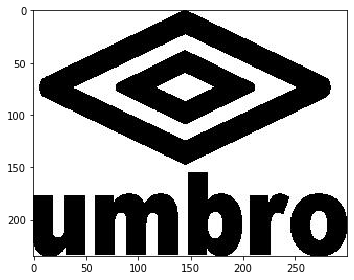

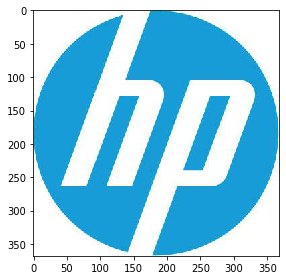

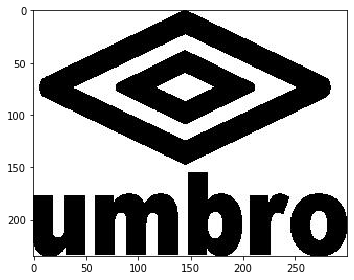

In [101]:
io.imshow(Anchor_img)
plt.show()
io.imshow(Negative_img)
plt.show()
io.imshow(Positive_img)
plt.show()

In [102]:
train_df, valid_df=train_test_split(df,test_size=0.20,random_state=42)

In [103]:
train_df.shape, valid_df.shape

((8, 3), (2, 3))

In [104]:
class APN_Dataset(Dataset):

  def __init__(self,df):
    self.df=df

  def __len__(self):
    return self.df.shape[0]

  def __getitem__(self,idx):
    row=self.df.iloc[idx]
    A_img=io.imread(DATA_DIR+row.Anchor)
    N_img=io.imread(DATA_DIR+row.Negative)
    P_img=io.imread(DATA_DIR+row.Positive)

    A_img=torch.from_numpy(A_img).permute(2,0,1)/255.0
    P_img=torch.from_numpy(P_img).permute(2,0,1)/255.0
    N_img=torch.from_numpy(N_img).permute(2,0,1)/255.0


    return A_img, P_img, N_img

  


In [105]:
trainset=APN_Dataset(train_df)
validset=APN_Dataset(valid_df)

In [106]:
len(trainset), len(validset)

(8, 2)

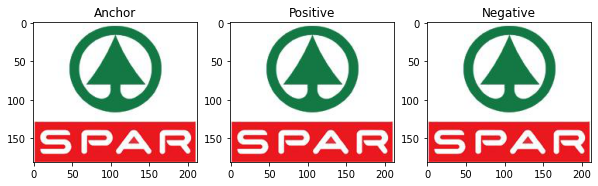

In [107]:
idx = 2
A,P,N = trainset[idx]

f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize= (10,5))

ax1.set_title('Anchor')
ax1.imshow(A.numpy().transpose((1,2,0)), cmap = 'gray')

ax2.set_title('Positive')
ax2.imshow(P.numpy().transpose((1,2,0)), cmap = 'gray')

ax3.set_title('Negative')
ax3.imshow(N.numpy().transpose((1,2,0)), cmap = 'gray')

In [108]:
trainloader=DataLoader(trainset,batch_size=BAtch_size, shuffle=True) 
validloader=DataLoader(validset, batch_size=BAtch_size) 

In [109]:
print(f"No. of batches in trainloader : {len(trainloader)}")
print(f"No. of batches in validloader : {len(validloader)}")

No. of batches in trainloader : 8
No. of batches in validloader : 2


In [110]:
for A,P,N in trainloader:
  break
    
print(f"One image batch shape : {A.shape}")

One image batch shape : torch.Size([1, 3, 235, 300])


In [111]:
efficientnet=timm.create_model('efficientnet_b0', pretrained='True')

In [112]:
efficientnet.classifier

Linear(in_features=1280, out_features=1000, bias=True)

In [113]:
class APN_Model(nn.Module):
  def __init__(self,emb_size=512):
    super(APN_Model, self).__init__()

    self.efficientnet=timm.create_model('efficientnet_b0', pretrained='True')
    self.efficientnet.classifier=nn.Linear(in_features=self.efficientnet.classifier.in_features, out_features=emb_size)

  def forward(self,images):
    embeddings=self.efficientnet(images)
    return embeddings
  

In [114]:
model=APN_Model()
model.to(DEVICE);

In [115]:
def train_fn(model, dataloader, optimizer, criterion):
  model.train()    # ONN Dropout Layer
  total_loss=0.0
  for A, P, N in tqdm(dataloader):
    A,P,N=A.to(DEVICE), P.to(DEVICE), N.to(DEVICE)
    A_embs=model(A)
    P_embs=model(P)
    N_embs=model(N)

    loss=criterion(A_embs,P_embs,N_embs)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    total_loss+=loss.item()
  return total_loss/len(dataloader)


In [116]:
def eval_fn(model, dataloader, criterion):
  model.eval()     # Off dropout layer
  total_loss=0.0
  for A, P, N in tqdm(dataloader):
    A,P,N=A.to(DEVICE), P.to(DEVICE), N.to(DEVICE)

    A_embs=model(A)
    P_embs=model(P)
    N_embs=model(N)
    loss=criterion(A_embs,P_embs,N_embs)
    total_loss+=loss.item()
  
  return total_loss


In [117]:
criterion=nn.TripletMarginLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=LR)

In [118]:
best_valid_loss=np.Inf
for i in range (EPOCHS):
  train_loss=train_fn(model,trainloader,optimizer,criterion) 
  valid_loss=eval_fn(model,validloader, criterion)

  if valid_loss < best_valid_loss:
    torch.save(model.state_dict(), 'best_model.pt')
    best_valid_loss=valid_loss
    print("Saved_weight_success")
  print(f"Epochs : {i+1} train_loss : {train_loss} valid_loss : {valid_loss}")

100%|██████████| 2/2 [00:00<00:00, 17.48it/s]


Saved_weight_success
Epochs : 1 train_loss : 0.2646627277135849 valid_loss : 0.0


100%|██████████| 2/2 [00:00<00:00, 17.20it/s]


Epochs : 2 train_loss : 0.25 valid_loss : 0.0


100%|██████████| 2/2 [00:00<00:00, 16.91it/s]


Epochs : 3 train_loss : 0.25 valid_loss : 0.0


100%|██████████| 2/2 [00:00<00:00, 17.25it/s]


Epochs : 4 train_loss : 0.25 valid_loss : 0.0


100%|██████████| 2/2 [00:00<00:00, 17.19it/s]


Epochs : 5 train_loss : 0.25 valid_loss : 0.0


100%|██████████| 2/2 [00:00<00:00, 12.99it/s]


Epochs : 6 train_loss : 0.25 valid_loss : 0.0


100%|██████████| 2/2 [00:00<00:00, 13.33it/s]


Epochs : 7 train_loss : 0.25 valid_loss : 0.0


100%|██████████| 2/2 [00:00<00:00, 17.91it/s]


Epochs : 8 train_loss : 0.25 valid_loss : 0.0


100%|██████████| 2/2 [00:00<00:00, 18.04it/s]


Epochs : 9 train_loss : 0.25 valid_loss : 0.0


100%|██████████| 2/2 [00:00<00:00, 18.24it/s]


Epochs : 10 train_loss : 0.25 valid_loss : 0.0


100%|██████████| 2/2 [00:00<00:00, 17.79it/s]


Epochs : 11 train_loss : 0.25 valid_loss : 0.0


100%|██████████| 2/2 [00:00<00:00, 15.85it/s]


Epochs : 12 train_loss : 0.25 valid_loss : 0.0


100%|██████████| 2/2 [00:00<00:00, 16.36it/s]


Epochs : 13 train_loss : 0.25 valid_loss : 0.0


100%|██████████| 2/2 [00:00<00:00, 16.96it/s]


Epochs : 14 train_loss : 0.25 valid_loss : 0.0


100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

Epochs : 15 train_loss : 0.25 valid_loss : 0.0


In [119]:
def get_encoding_csv(model,anc_img_names):
  anc_img_names_arr=np.array(anc_img_names)
  encodings=[]
  model.eval()    #because no dropout layer
  with torch.no_grad():
    for i in tqdm(anc_img_names_arr):
      A=io.imread(DATA_DIR+i)
      A=torch.from_numpy(A).permute(2,0,1) /255.0
      A=A.to(DEVICE)

      A_enc=model(A.unsqueeze(0))      #(c,w,h)   --> (b,c,w,h)
      encodings.append(A_enc.squeeze().cpu().detach().numpy())
    encodings=np.array(encodings)
    encodings=pd.DataFrame(encodings)
    df_enc=pd.concat([anc_img_names, encodings], axis=1)
  
  return df_enc


In [120]:
model.load_state_dict(torch.load('best_model.pt'))
df_enc=get_encoding_csv(model, df['Anchor'])

100%|██████████| 10/10 [00:00<00:00, 19.21it/s]


In [121]:
df_enc.to_csv('database.csv', index=False)
df_enc.head()

,Anchor,0,1,2,3,4,5,6,7,8,...,502,503,504,505,506,507,508,509,510,511
0,levis.jpg,0.054582,-0.023506,0.075289,0.336178,-0.108397,0.077934,-0.082586,0.148105,0.209761,...,0.039300,0.381306,0.075778,-0.000748,-0.098863,0.326707,0.001172,0.127031,0.250290,0.035532
1,kfc.jpg,0.152218,0.051201,0.229096,0.358346,0.059592,0.034083,0.133228,-0.005812,-0.274361,...,0.093090,0.025715,0.067884,-0.264099,-0.027137,0.060716,0.199061,-0.072931,-0.290178,0.401134
2,nescafe.jpg,-0.268425,-0.155616,0.131180,0.134234,-0.142998,0.136326,0.152654,-0.193265,-0.189773,...,0.246730,0.222121,-0.004342,0.052366,0.029897,0.108717,0.172151,-0.104968,0.179180,-0.283966
3,tacobell.jpg,0.266034,0.417792,0.129625,0.285488,-0.125398,0.111235,0.157757,0.171789,-0.594135,...,0.107861,0.266955,0.128490,-0.063040,-0.101785,-0.346523,-0.018004,-0.002551,0.139880,0.002158
4,umbro.jpg,-0.036049,-0.317306,0.021199,0.286102,-0.260020,-0.167488,0.148945,0.149518,-0.106244,...,0.273960,0.104168,0.065747,0.178784,0.086480,-0.096753,0.085686,-0.031083,0.130439,0.075982


In [122]:
def euclidean_dist(img_enc, anc_enc_arr):
  dist=np.sqrt(np.dot(img_enc-anc_enc_arr,(img_enc-anc_enc_arr).T))
  return dist

In [292]:
idx=2
img_name=df_enc['Anchor'].iloc[idx]
img_path=DATA_DIR+  img_name

#img=io.imread("/content/Computer-vision/Assignment2/Dataset/Problem-1/logo matching/Ex1/levis1.jpg")
img=io.imread(img_path)
img=torch.from_numpy(img).permute(2,0,1) / 255.0
model.eval()

with torch.no_grad():
  img=img.to(DEVICE)
  img_enc=model(img.unsqueeze(0))
  img_enc=img_enc.detach().cpu().numpy()
  

In [293]:
# c= df_enc.iloc[:,1:]
# print(c)
# print(c[0])
# print(c[0][0])
# print(c[0][1])

In [299]:
# encoding for the anchor image
anc_enc_arr=df_enc.iloc[:,1:].to_numpy()
# Anchor image names
anc_img_names=df_enc['Anchor']

#anc_enc_arr.shape

In [300]:
distance=[]
for i in range(anc_enc_arr.shape[0]):
  dist=euclidean_dist(img_enc, anc_enc_arr[i: i+1, :])
  distance=np.append(distance,dist)



In [301]:
anc_img_names

0            levis.jpg
1              kfc.jpg
2          nescafe.jpg
3         tacobell.jpg
4            umbro.jpg
5               lg.jpg
6            shell.jpg
7             spar.jpg
8               hp.jpg
9    tommyhilfiger.jpg
Name: Anchor, dtype: object

In [296]:
print(distance)

[4.44400692 5.32357788 0.         4.9572649  4.47411728 4.3961792
 4.54507351 4.03387976 4.12198353 4.07293558]
